# Statistics of subjects' state

In [2]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
#plt.rcParams['font.sans-serif']=['Noto Sans CJK HK']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False    # 用来正常显示负号

## Subject recruit

- Number of children enrolled
- Number of subjects who passed the initial screening
    - Number of subjects exited
    - Number of subjects who have been trained
    - Number of subjects who are completed experiment.
    - Number of subjects waiting to training

In [2]:
# load subject pool
with warnings.catch_warnings(record=True):
    warnings.simplefilter("always")
    sub_pool1 = pd.read_excel(r'/mnt/workdir/DCM/docs/被试招募及训练/认知图谱-被试库.xlsx',sheet_name='2021-儿童',engine="openpyxl")[['姓名','年龄','状态']].dropna(subset=['年龄'])
    sub_pool2 = pd.read_excel(r'/mnt/workdir/DCM/docs/被试招募及训练/认知图谱-被试库.xlsx',sheet_name='2022-儿童',engine="openpyxl")[['姓名','年龄','状态']].dropna(subset=['年龄'])
sub_pool = pd.concat((sub_pool1,sub_pool2),axis=0)

with warnings.catch_warnings(record=True):
    warnings.simplefilter("always")
    participants = pd.read_csv(r'/mnt/workdir/DCM/BIDS/participants.tsv',sep='\t')[['Name','Age','usable']].dropna(subset=['Age'])
participants_age = participants.query('(Age<=18)and(usable==1)')['Age'].values

Number of subjects who are completed experiment: 21


Text(0.5, 1.0, 'Number of subjects waiting to train')

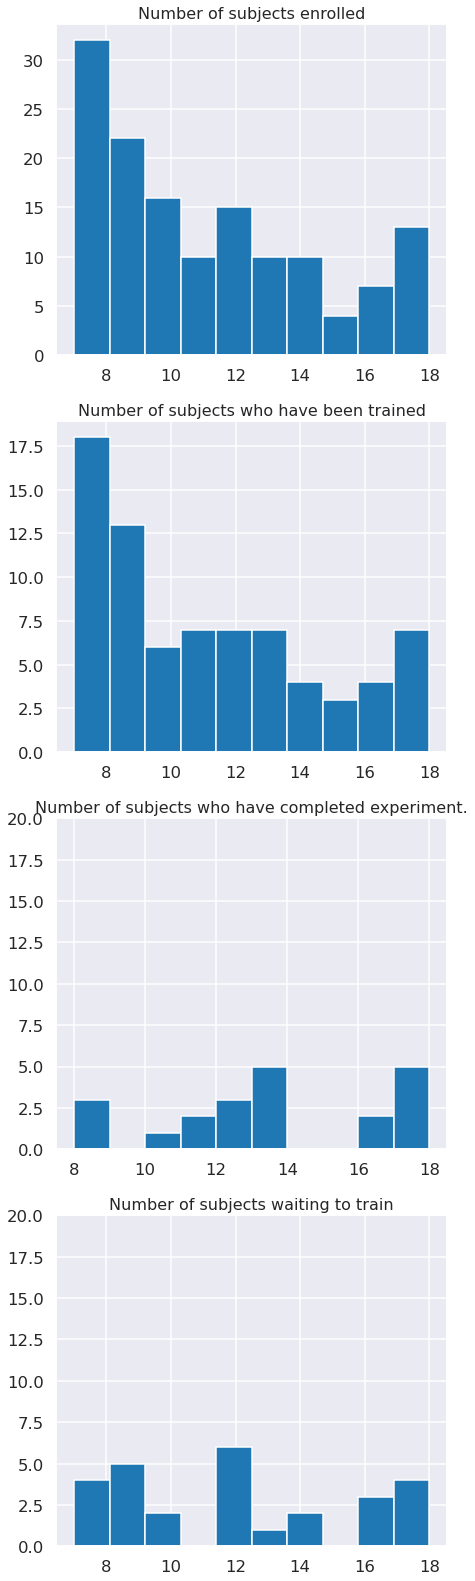

In [3]:
# Number of subjects enrolled across different ages
fig,ax = plt.subplots(4,1,figsize=(7,28))
sub_age = sub_pool['年龄'].values
ax[0].hist(sub_age)
ax[0].set_title("Number of subjects enrolled",size=16)

# Number of subjects who have been trained across different ages
sub_age = sub_pool.query("(状态=='已完成')or(状态=='训练中')")['年龄'].values
ax[1].hist(sub_age)
ax[1].set_title("Number of subjects who have been trained",size=16)

# Number of subjects who are completed experiment.
print("Number of subjects who are completed experiment:",len(participants_age))
ax[2].hist(participants_age)
ax[2].set_ylim((0,20))
ax[2].set_title("Number of subjects who have completed experiment.",size=16)

# Number of subjects waiting to train
sub_age = sub_pool.query("(状态=='未训练')")['年龄'].values
ax[3].hist(sub_age)
ax[3].set_ylim((0,20))
ax[3].set_title("Number of subjects waiting to train",size=16)

In [1]:
sub_state = sub_pool['状态'].value_counts()
print(sub_state)
fig,ax = plt.subplots()
plt.pie(sub_state,labels=sub_state.index,autopct='%1.1f%%')

NameError: name 'sub_pool' is not defined

In [25]:
# count the subject number with fmri data in each age stage
import pandas as pd
data = pd.read_csv(r'/mnt/workdir/DCM/BIDS/participants.tsv',sep='\t')
data_fmri = data.query('game1_fmri==1')

print('The number of children:',len(data_fmri[data_fmri['Age']<=18]))

age_num = []
for i in range(8,19):
    num = len(data_fmri[data_fmri['Age']==i])
    print(f'Age-{i}',':',num)
    age_num.append(num)

plt.bar(range(8,19),age_num)

The number of children: 112
Age-8 : 8
Age-9 : 4
Age-10 : 14
Age-11 : 12
Age-12 : 11
Age-13 : 5
Age-14 : 11
Age-15 : 10
Age-16 : 11
Age-17 : 14
Age-18 : 12


NameError: name 'plt' is not defined

In [7]:
age_lack_num = []
for i,num in zip(range(8,19),age_num):
    tmp = 10 - num
    if tmp <0:
        tmp = 0
    print(f'Age-{i} lacking number',':',tmp)
    age_lack_num.append(tmp)
print("The total lacking number of children:", sum(age_lack_num))

Age-8 lacking number : 2
Age-9 lacking number : 6
Age-10 lacking number : 0
Age-11 lacking number : 0
Age-12 lacking number : 0
Age-13 lacking number : 5
Age-14 lacking number : 0
Age-15 lacking number : 0
Age-16 lacking number : 0
Age-17 lacking number : 0
Age-18 lacking number : 0
The total lacking number of children: 13


In [22]:
adult_num = []
for i in range(19,29):
    num = len(data_fmri[data_fmri['Age']==i])
    print(f'Age-{i}',':',num)
    adult_num.append(num)
print("The total number of adults:", sum(adult_num))
plt.bar(range(19,29), adult_num)

Age-19 : 4
Age-20 : 2
Age-21 : 7
Age-22 : 3
Age-23 : 8
Age-24 : 5
Age-25 : 1
Age-26 : 4
Age-27 : 3
Age-28 : 2
The total number of adults: 39


NameError: name 'plt' is not defined